In [1]:
import torch 

from segmentation.train import train
from segmentation.model import UNet_2D



--- mode: finetune ---
device: cpu
model:  <class 'segmentation.model.UNet_2D'>
early stopping: True
| - patience: 50
classes: 3
Num of data:
| - training:   16
| - validation: 2
| - test:       3
Loaded pretrained model: ../models/pretrain/pretrain_10.pth
Loss funtion: JaccardLoss
-----------------------------------------
epoch: 1
[training]
| - batch: 1  loss: 0.88357
| - batch: 2  loss: 0.89816
| - batch: 3  loss: 0.86451
| - batch: 4  loss: 0.84020

[validation]
| - batch: 1
	| - loss:      0.82097
	| - Accuracy:  0.89555
	| - F1 score:  0.84972
	| - IOU
		| - micro: 0.73870
		| - class:
			| - class 0: 0.89234
			| - class 1: 0.04228
			| - class 2: 0.63103
| - Average:
	| - TP/FP/FN/TN:
		| - tp: [3232.5   30.   366. ]
		| - fp: [183. 510. 123.]
		| - fn: [207.  169.5  91. ]
		| - tn: [ 473.5 3386.5 3516. ]
	| - IoU:
		| - micro: 0.73870
		| - class
			| - class 0: 0.89234
			| - class 1: 0.04228
			| - class 2: 0.63103

-----------------------------------------
epoch: 2
[traini

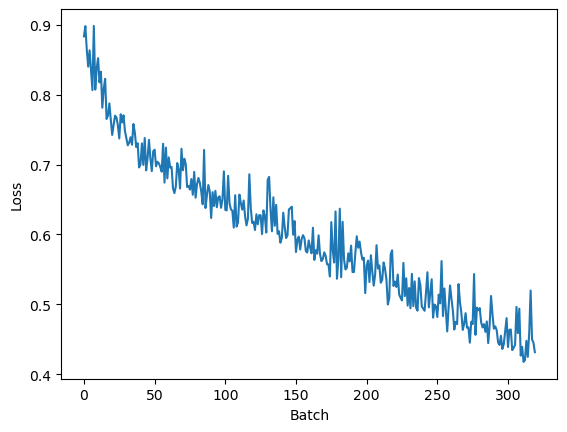

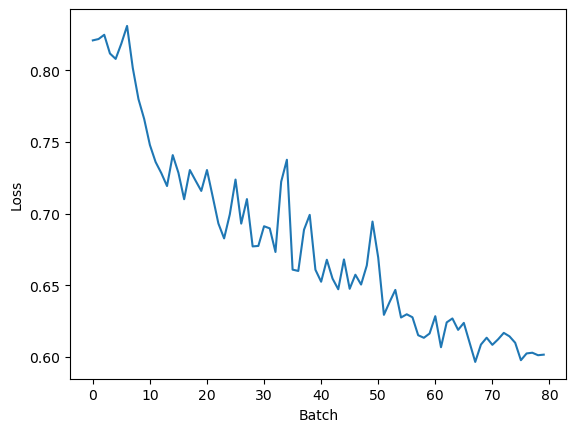

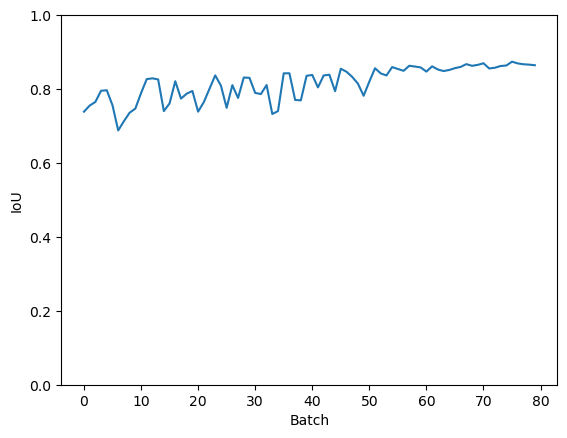

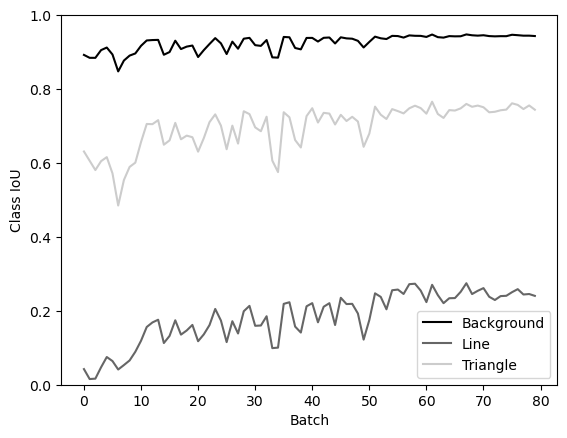

In [5]:
mode = "finetune"

if mode == "pretrain":

    method = "pretrain"
    dir_input = "../inputs/simu"
    dir_output = "../outputs/pretrain"
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    #device = torch.device("cpu")
    model = UNet_2D(classes=3).to(device)
    train(
        method=method,
        dir_input=dir_input,
        dir_output=dir_output,
        classes=3,
        device=device, 
        model=model,
        num_data=600,
        val_percent=0.2,
        test_percent=0.2,
        loss_type="CrossEntropyLoss",
        epochs=80,
        batch_size=32,
        learning_rate=0.001,
        early_stopping=True,
        patience=5,
    )

elif mode == "finetune":
    method = "finetune"
    dir_input = "../inputs/hitachi/dataset1218"
    dir_output = "../outputs/finetune"
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model = UNet_2D(classes=3).to(device)
    train(
        method=method,
        dir_input=dir_input,
        dir_output=dir_output,
        classes=3,
        device=device, 
        model=model,
        loaded_model_index=10, # 経験的にこれは必要
        val_percent=0.1,
        test_percent=0.1,
        loss_type="JaccardLoss",
        epochs=80,
        batch_size=4,
        learning_rate=0.0001,
        early_stopping=True,
        patience=50,
    )